### in this repository, we have found all the neuronal cell type

In [16]:
import pandas as pd
import scanpy as sc

[Executed on 2023-12-05 14:16:22.827013]


In [2]:
#old_sgns=sc.read_h5ad('/proj/sensoryaging/data/data/up_dated_data/SGNs/FINAL_AFTER_11.7/known_cluster.h5ad')
new_sgns=sc.read_h5ad('/proj/sensoryaging/60_plates_data/Sgns/each_component/First_annotated.h5ad')

[Executed on 2023-12-05 13:43:05.040388]


[Executed on 2023-12-05 13:48:23.775299]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:61: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:148: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['hvg'] = {'flavor': 'seurat_v3'}


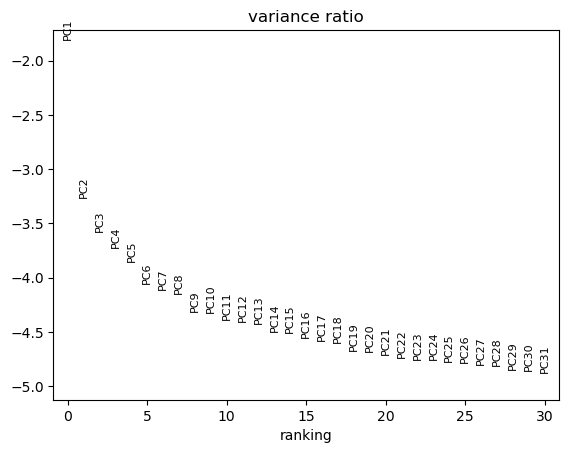

/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(val

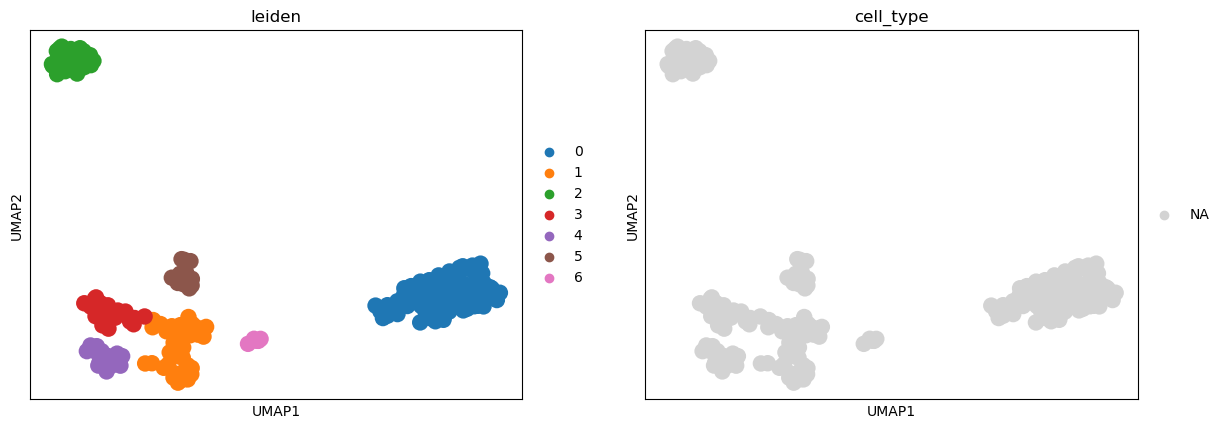

In [6]:
cluster3=new_sgns[new_sgns.obs['leiden']=='3',:]
cluster3
cluster3.X=cluster3.layers['log1p'].copy()
sc.pp.highly_variable_genes(cluster3, n_top_genes=800, flavor='seurat_v3')
sc.pp.scale(cluster3, max_value=10)
sc.tl.pca(cluster3, svd_solver='arpack')
sc.pl.pca_variance_ratio(cluster3, log=True)

sc.pp.neighbors(cluster3, n_neighbors=11, n_pcs=10)

sc.tl.umap(cluster3)

sc.tl.leiden(cluster3, resolution=0.5)

sc.pl.umap(cluster3,color=['leiden','cell_type'])

[Executed on 2023-12-05 13:48:42.055194]


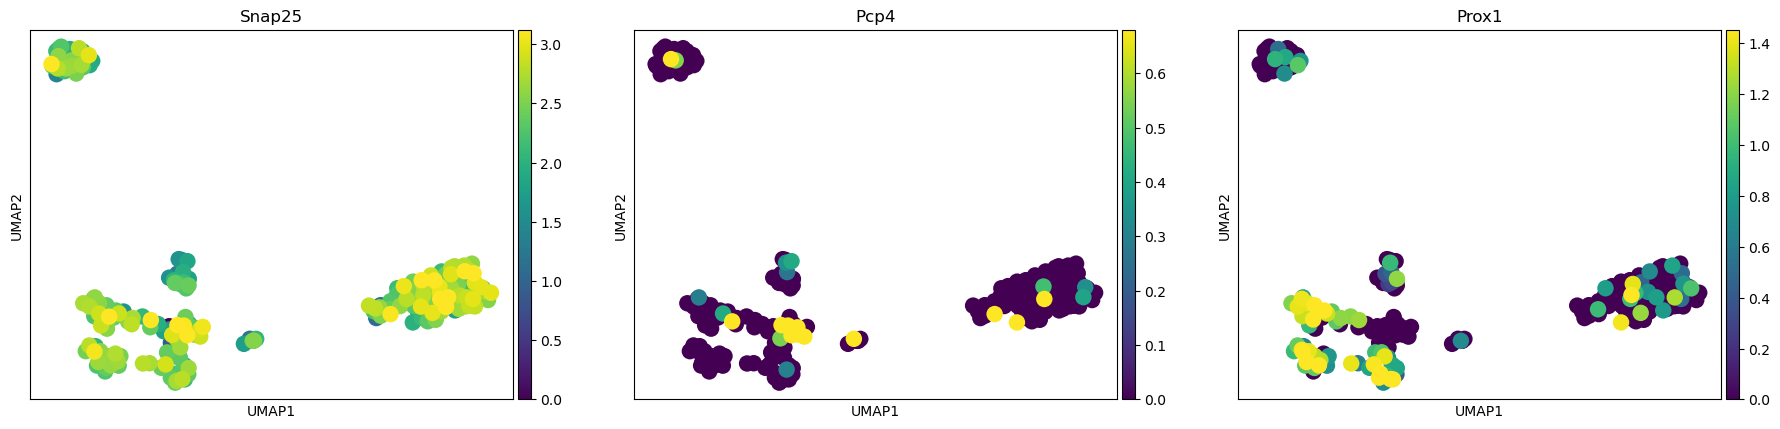

In [7]:
sc.pl.umap(cluster3, color=['Snap25','Pcp4','Prox1'],layer='log1p',vmax='p95')

[Executed on 2023-12-05 13:48:45.050140]


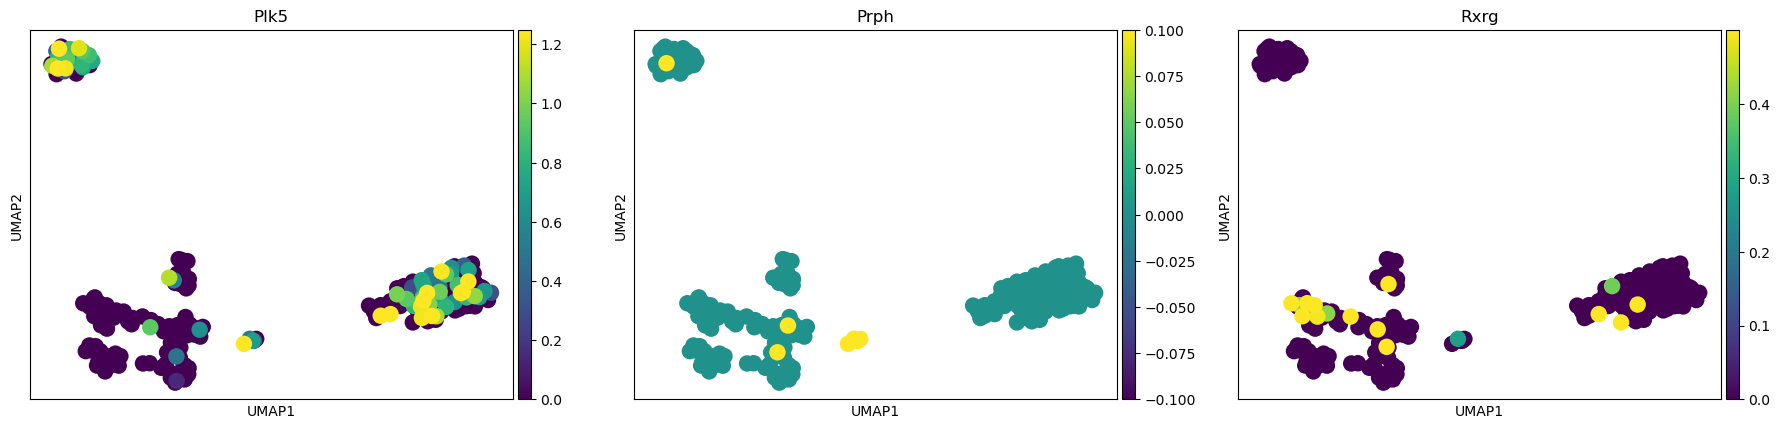

In [8]:
sc.pl.umap(cluster3,color=['Plk5','Prph','Rxrg'],vmax='p95',layer='log1p')

[Executed on 2023-12-05 13:49:02.863645]


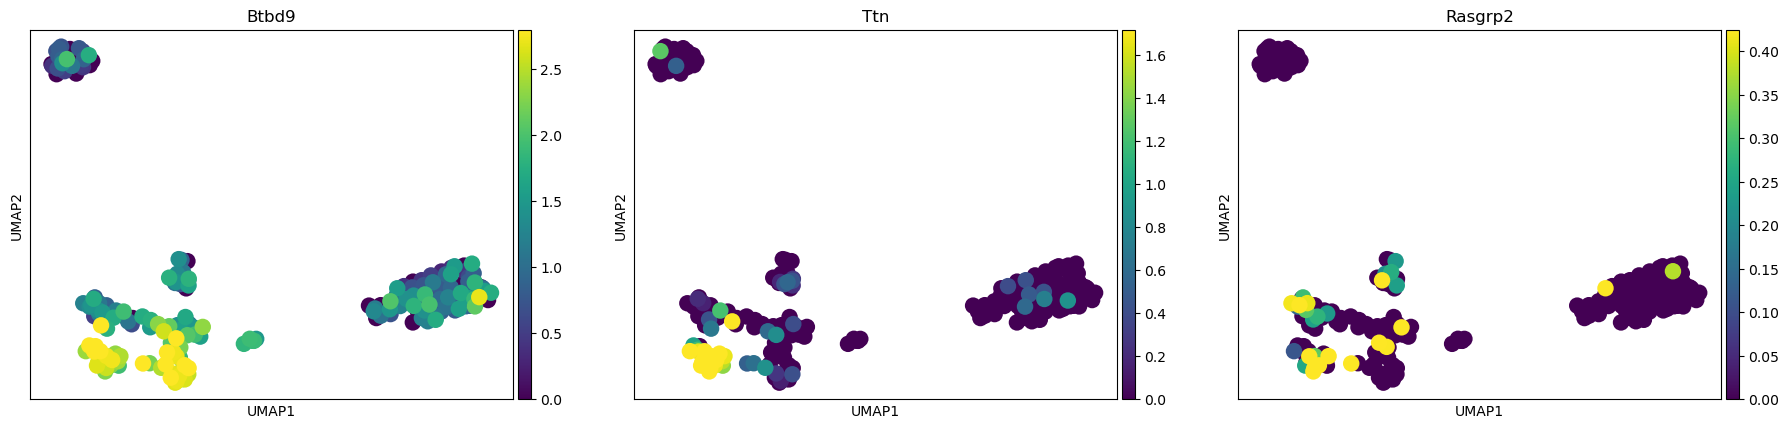

In [9]:
sc.pl.umap(cluster3, color=['Btbd9','Ttn','Rasgrp2'],vmax='p95', layer='log1p')

[Executed on 2023-12-05 13:49:09.094865]


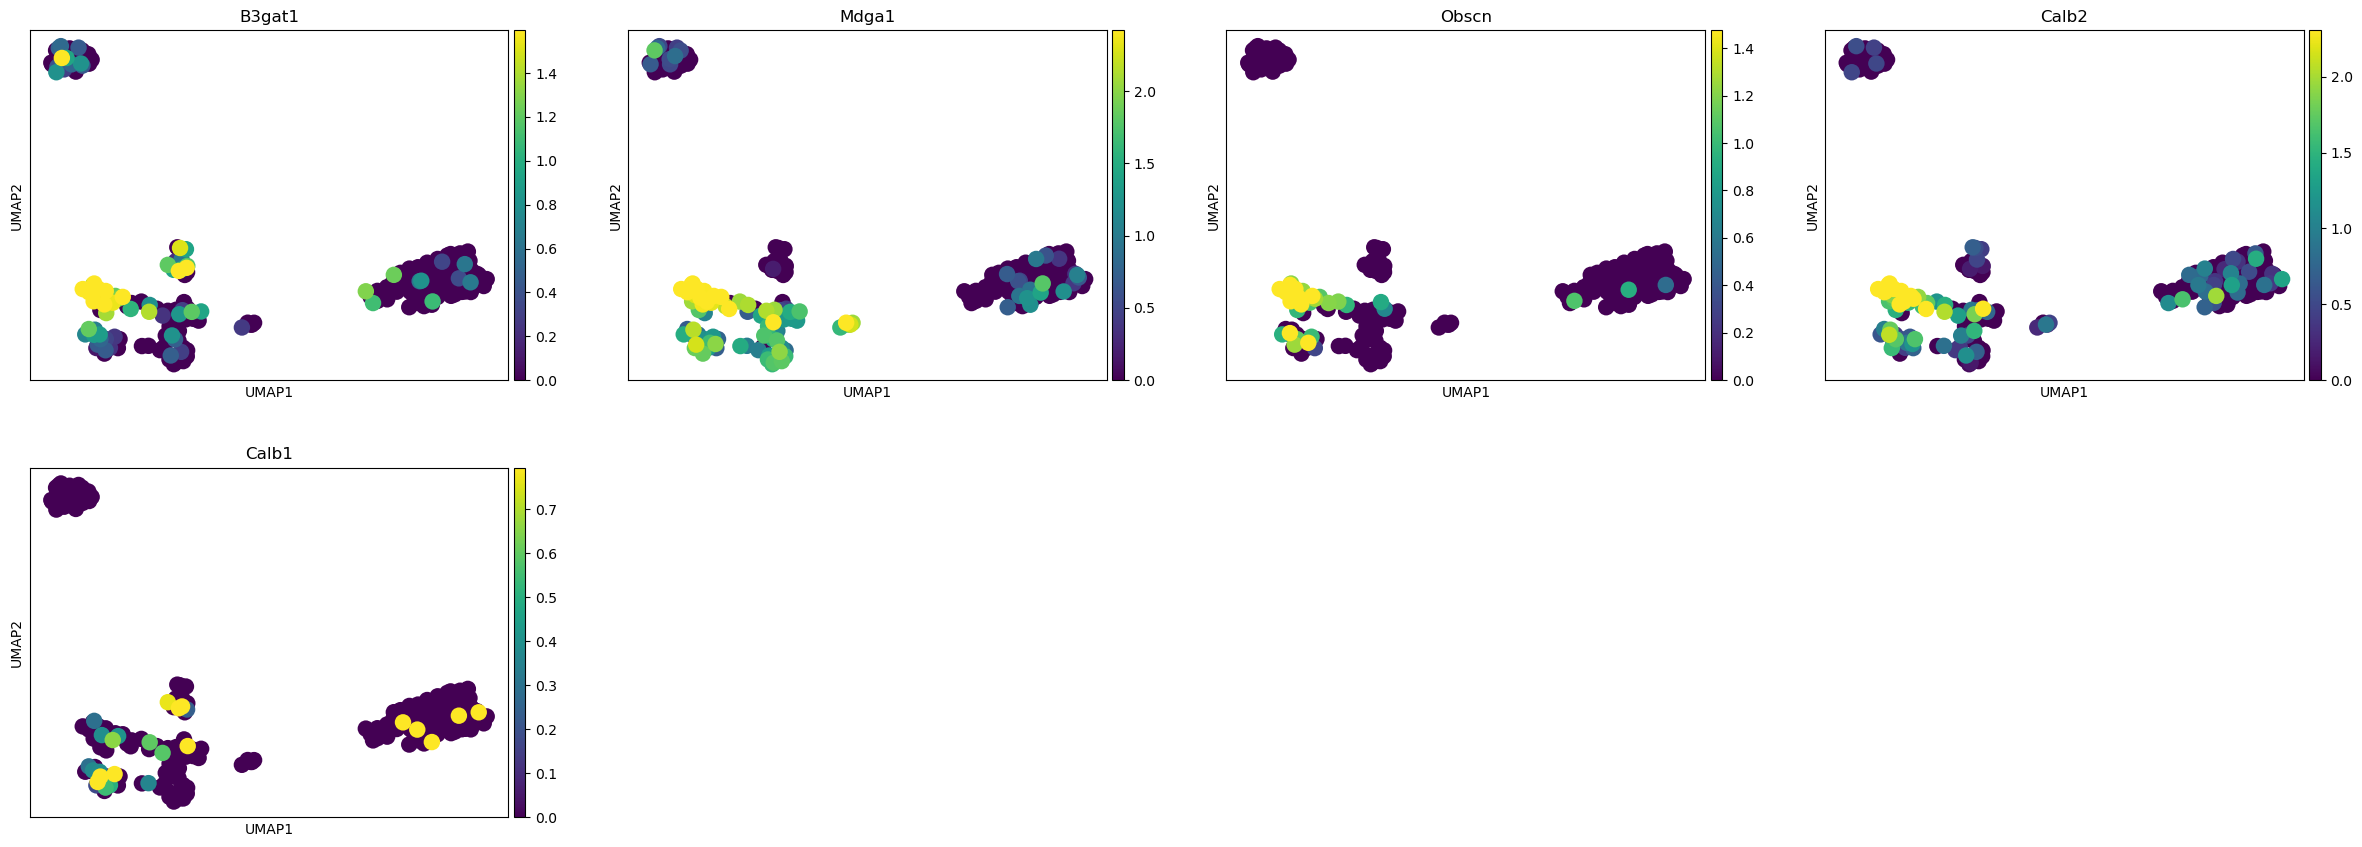

In [10]:
sc.pl.umap(cluster3,color=['B3gat1','Mdga1','Obscn','Calb2','Calb1'],layer='log1p',vmax='p95')

[Executed on 2023-12-05 13:58:30.028005]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


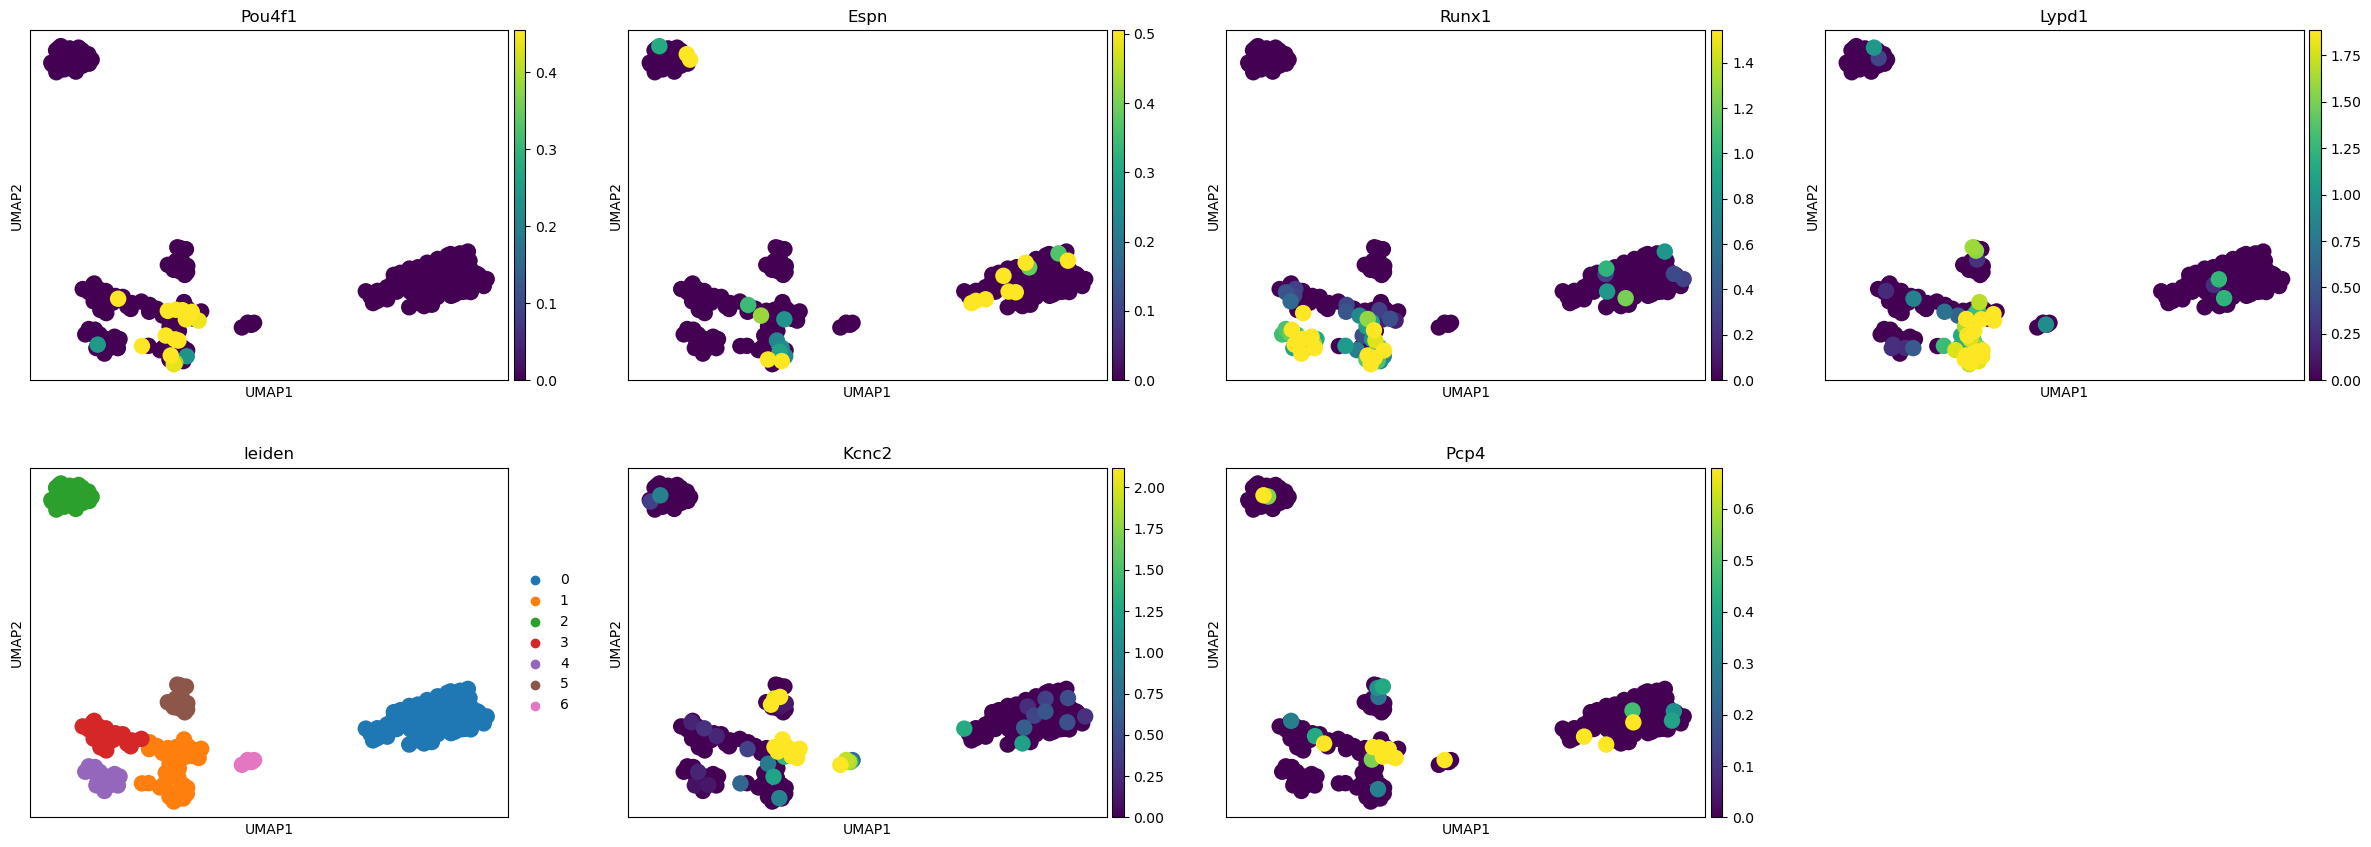

In [15]:
sc.pl.umap(cluster3,color=['Pou4f1','Espn','Runx1','Lypd1','leiden','Kcnc2','Pcp4'],layer='log1p',vmax='p95')


# get rid of pcp4, recluster, vestibular ganglion, nly keep sgns, kcnc2 low because aging, high because of vestibular

In [ ]:
import scanpy as sc

# Assuming cluster3 is your AnnData object
# Find the index of 'Pcp4' in var_names
pcp4_index = cluster3.var_names.get_loc('Pcp4')

# Extract the expression of 'Pcp4' across all cells
pcp4_expression = cluster3.layers['log1p'][:, pcp4_index]

# Filter out cells where Pcp4 expression is greater than 0.5
cells_to_keep = pcp4_expression <= 0.5
cluster3_filtered = cluster3[cells_to_keep.flatten(), :]

# cluster3_filtered now contains only the cells with Pcp4 expression <= 0.5
cluster3_filtered

In [12]:
cluster3

[Executed on 2023-12-05 13:49:58.432576]


AnnData object with n_obs × n_vars = 214 × 35675
    obs: 'platesID', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cell_type', 'leiden_2'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell_type_colors', 'hvg', 'leiden', 'leiden_2_colors', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'Scale', 'log1p', 'reads', 'umi'
    obsp: 'connectivities', 'distances'

In [13]:
cluster3.obsm['neuron-umap']=cluster3.obsm['X_umap'].copy()


[Executed on 2023-12-05 13:50:38.881132]


In [14]:
cluster3.write_h5ad('/proj/sensoryaging/60_plates_data/Sgns/each_component/neuron_annotated.h5ad')

[Executed on 2023-12-05 13:50:40.338005]


In [10]:
import pandas as pd
sc.tl.rank_genes_groups(cluster3, 'leiden', method='wilcoxon', n_genes=1000)


pd.DataFrame(cluster3.uns['rank_genes_groups']['names']).head(10)

[Executed on 2023-12-04 15:22:46.288346]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/proj/sensoryag

,0,1,2,3,4,5,6,7
0,Grik2,D130009I18Rik,Lrrtm4,Cdh9,Ttn,Mdga2,Gm28437,Mylf-ps
1,Fgf14,Grm8,Mgat5,Calb2,Pdzd2,Whrn,mt-Co1,Skap1
2,Ntrk3,Mgat4c,Gm42397,Mdga1,Lhfpl3,Meis2,Gsn,Abi3bp
3,Grm4,Lypd1,Dgkb,Ghr,Runx1,Smyd4,Apoe,Hip1
4,Tenm1,Bcl11a,Dscaml1,Rgs6,Grm7,9330162G02Rik,Gm10925,Tmem132e
5,Mctp1,Colgalt2,Lmx1a,Obscn,Camta1,Sgcd,Mpz,Dusp29
6,Syne1,Nckap5,Arpp21,Nin,Sema3e,Mkx,Apod,Grik3
7,Pde10a,Btbd9,Trank1,Iqsec3,Grip1,Sntg1,Eef1a1,Prph
8,Trhde,Csmd1,Ppp1r14c,Cpne4,Btbd9,Gm36264,Ptgds,Smad6
9,Caln1,Hmcn1,Zic1,Spock3,Gm16083,Wsb1,Tiam1,Myl1


[Executed on 2023-12-04 15:24:44.440447]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


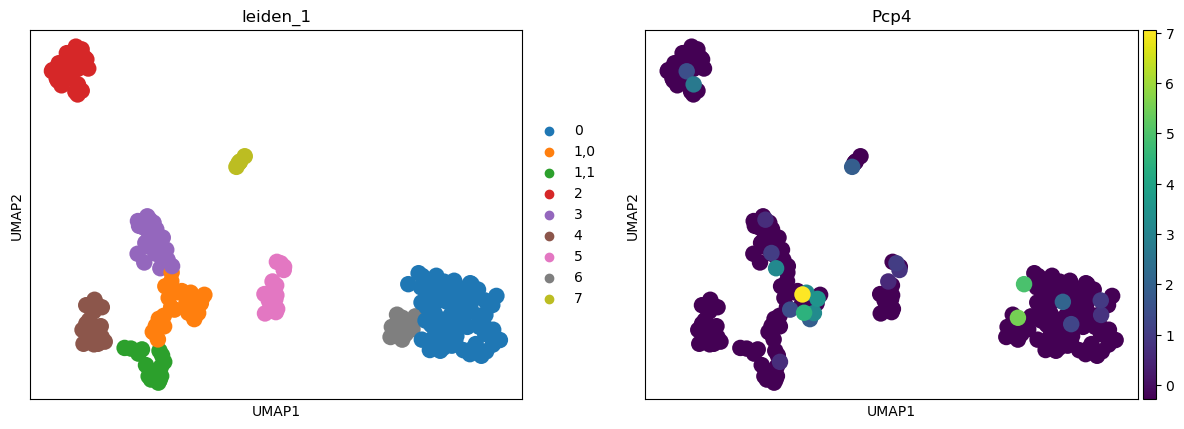

In [11]:
sc.tl.leiden(cluster3, restrict_to=('leiden',['1']),resolution=0.4, key_added='leiden_1')

sc.pl.umap(cluster3,color=['leiden_1','Pcp4'])



[Executed on 2023-12-05 14:17:44.096396]


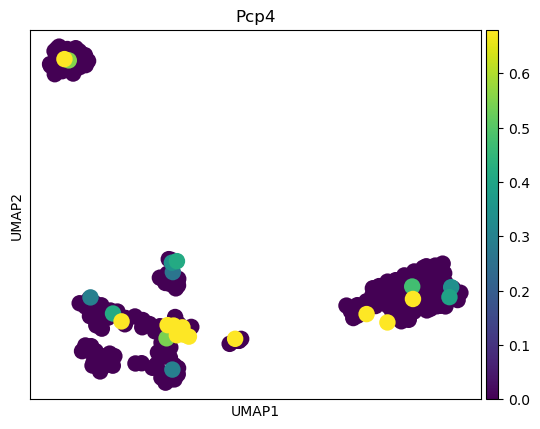

In [19]:
sc.pl.umap(cluster3, color=['Pcp4'],vmax='p95',layer='log1p')

In [13]:
cluster3

[Executed on 2023-12-04 15:26:20.343185]


AnnData object with n_obs × n_vars = 214 × 35675
    obs: 'platesID', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cell_type', 'leiden_2', 'leiden_1'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell_type_colors', 'hvg', 'leiden', 'leiden_2_colors', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap', 'rank_genes_groups', 'leiden_1_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'Scale', 'log1p', 'reads', 'umi'
    obsp: 'connectivities', 'distances'

In [22]:
cluster3=sc.read_h5ad('/proj/sensoryaging/60_plates_data/Sgns/each_component/neuron_annotated.h5ad')

[Executed on 2023-12-05 14:19:22.823868]


In [26]:
import scanpy as sc

# Assuming cluster3 is your AnnData object
# Find the index of 'Pcp4' in var_names
pcp4_index = cluster3.var_names.get_loc('Pcp4')

# Extract the expression of 'Pcp4' across all cells
pcp4_expression = cluster3.layers['log1p'][:, pcp4_index]

# Specify the Leiden cluster you want to filter (e.g., cluster 1)
desired_leiden_cluster = '1'

# Create a boolean mask for cells that are in the desired Leiden cluster
in_desired_cluster = cluster3.obs['leiden'] == desired_leiden_cluster

# Create a condition to identify cells with high Pcp4 expression in the desired cluster
high_expression_condition = (pcp4_expression > 0.5) & in_desired_cluster

# Invert the condition to keep cells with low Pcp4 expression or cells not in the desired cluster
cells_to_keep = ~high_expression_condition

# Apply the filter to your AnnData object
cluster3_filtered = cluster3[cells_to_keep, :]

# cluster3_filtered now contains cells with low Pcp4 expression in the desired Leiden cluster


[Executed on 2023-12-05 14:19:46.883489]


[Executed on 2023-12-05 14:25:15.937407]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(val

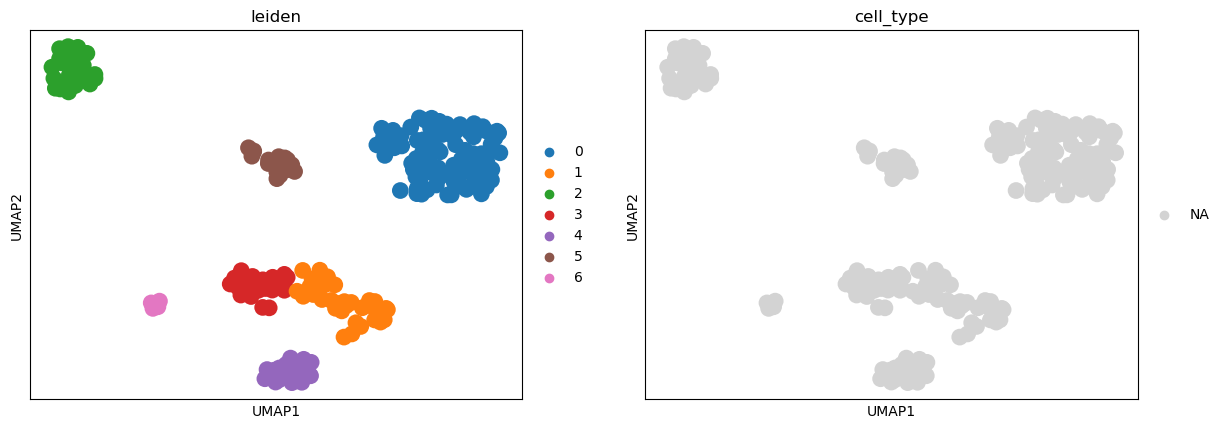

/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


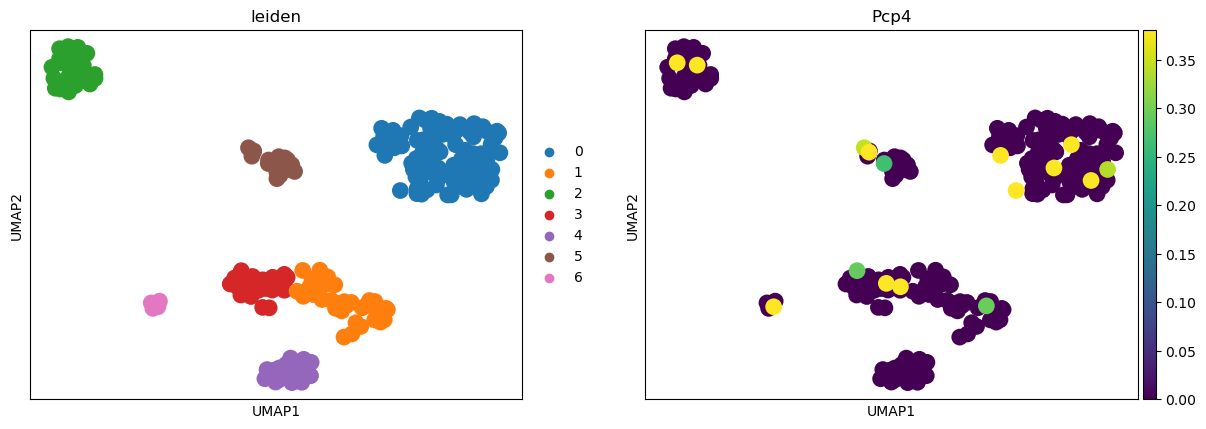

In [33]:
sc.pp.neighbors(cluster3_filtered, n_neighbors=11, n_pcs=10)

sc.tl.umap(cluster3_filtered)

sc.tl.leiden(cluster3_filtered, resolution=0.5)

sc.pl.umap(cluster3_filtered,color=['leiden','cell_type'])
sc.tl.leiden(cluster3_filtered, resolution=0.4)
sc.pl.umap(cluster3_filtered,color=['leiden','Pcp4'],vmax='p95',layer='log1p')

[Executed on 2023-12-05 14:25:49.499340]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


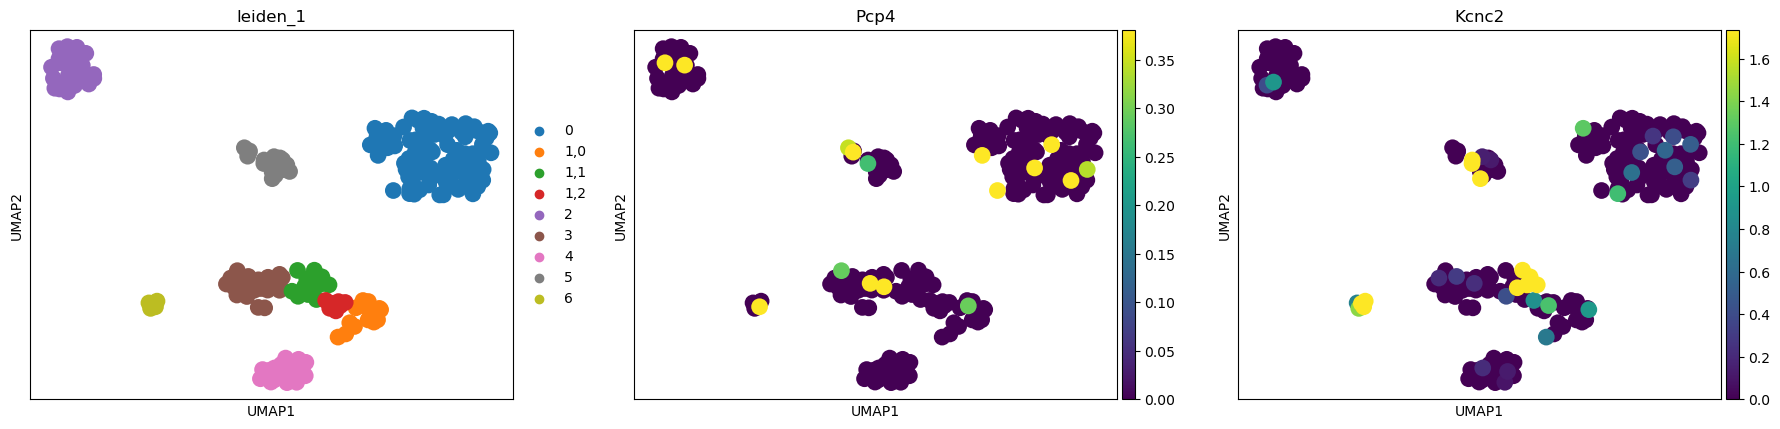

In [34]:
sc.pl.umap(cluster3_filtered,color=['leiden_1','Pcp4','Kcnc2'],vmax='p95',layer='log1p')

In [35]:
#remove cluster 1,1
cluster3_filtered_remove=cluster3_filtered[cluster3_filtered.obs['leiden_1']!='1,1',:]
cluster3_filtered_remove

[Executed on 2023-12-05 14:26:56.582057]


View of AnnData object with n_obs × n_vars = 195 × 35675
    obs: 'platesID', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cell_type', 'leiden_2', 'leiden_1'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell_type_colors', 'hvg', 'leiden', 'leiden_2_colors', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap', 'leiden_1_colors'
    obsm: 'X_pca', 'X_umap', 'neuron-umap'
    varm: 'PCs'
    layers: 'Scale', 'log1p', 'reads', 'umi'
    obsp: 'connectivities', 'distances'

[Executed on 2023-12-05 14:36:07.172132]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


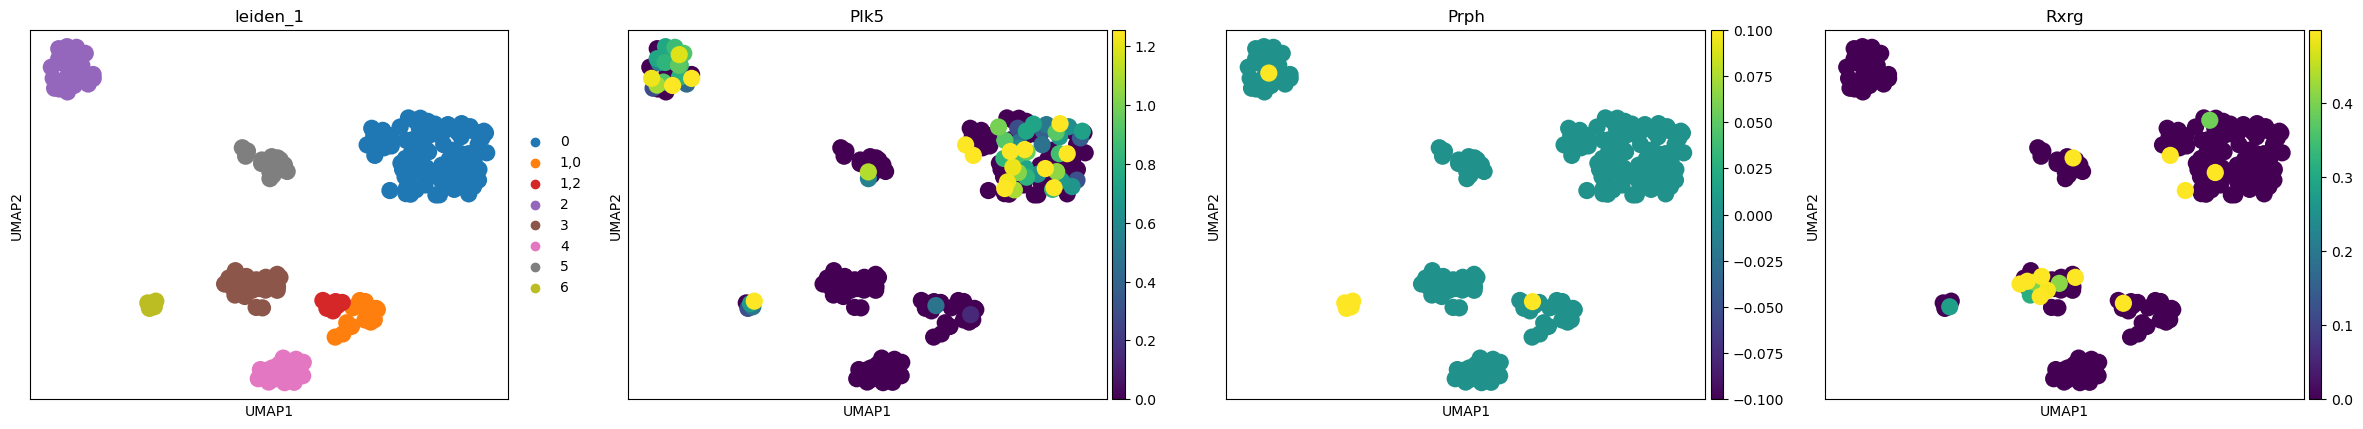

In [43]:
sc.pl.umap(cluster3_filtered_remove,color=['leiden_1','Plk5','Prph','Rxrg'],vmax='p95',layer='log1p')

In [44]:
cluster3_filtered_remove.obs['leiden_1'].value_counts()

[Executed on 2023-12-05 14:36:32.518046]


leiden_1
0      85
2      26
3      23
4      18
5      16
1,0    15
1,2     7
6       5
Name: count, dtype: int64

[Executed on 2023-12-05 14:49:52.310784]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


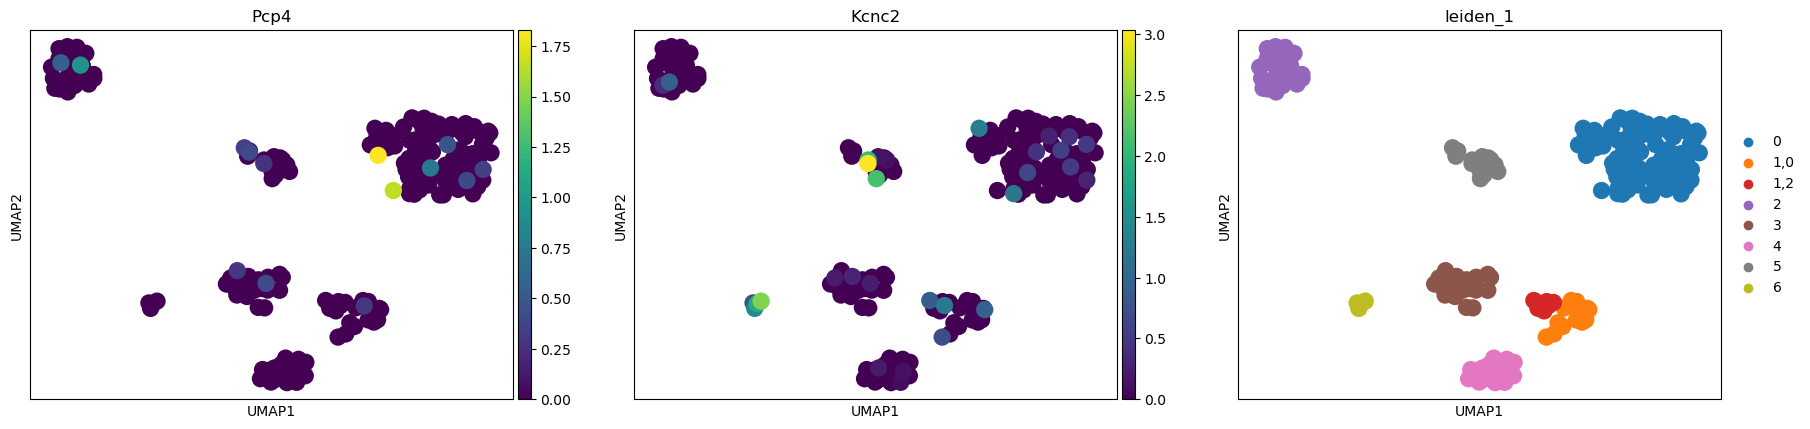

In [61]:
sc.pl.umap(cluster3_filtered_remove,color=['Pcp4','Kcnc2','leiden_1'],layer='log1p')

In [78]:
cluster3_filtered_remove.write_h5ad('/proj/sensoryaging/60_plates_data/Sgns/each_component/neuron_annotated_remove_2.h5ad')

[Executed on 2023-12-05 14:59:18.321446]


In [56]:
# 假设 cluster3_filtered_remove 是包含已过滤细胞的 AnnData 对象

# 提取 Pcp4 表达层的数据
pcp4_expression = cluster3_filtered_remove.layers['log1p'][:, pcp4_index]

# 创建条件来筛选在 Leiden 簇 6 中表达 Pcp4 > 0.6 的细胞
in_leiden_cluster_6 = cluster3_filtered_remove.obs['leiden_1'] == '6'
expression_above_0_6_in_cluster_6 = pcp4_expression[in_leiden_cluster_6] > 0.6

# 计算在 Leiden 簇 6 中表达 Pcp4 > 0.6 的细胞数量
num_cells_in_cluster_6_above_0_6 = expression_above_0_6_in_cluster_6.sum()

# 同样，为 Leiden 簇 3 执行相同操作
in_leiden_cluster_3 = cluster3_filtered_remove.obs['leiden_1'] == '3'
expression_above_0_6_in_cluster_3 = pcp4_expression[in_leiden_cluster_3] > 0.8

# 计算在 Leiden 簇 3 中表达 Pcp4 > 0.6 的细胞数量
num_cells_in_cluster_3_above_0_6 = expression_above_0_6_in_cluster_3.sum()

# 打印结果
print("在 Leiden 簇 6 中表达 Pcp4 > 0.6 的细胞数量:", num_cells_in_cluster_6_above_0_6)
print("在 Leiden 簇 3 中表达 Pcp4 > 0.6 的细胞数量:", num_cells_in_cluster_3_above_0_6)


[Executed on 2023-12-05 14:44:54.334987]
在 Leiden 簇 6 中表达 Pcp4 > 0.6 的细胞数量: 1
在 Leiden 簇 3 中表达 Pcp4 > 0.6 的细胞数量: 1


[Executed on 2023-12-05 14:49:16.417687]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


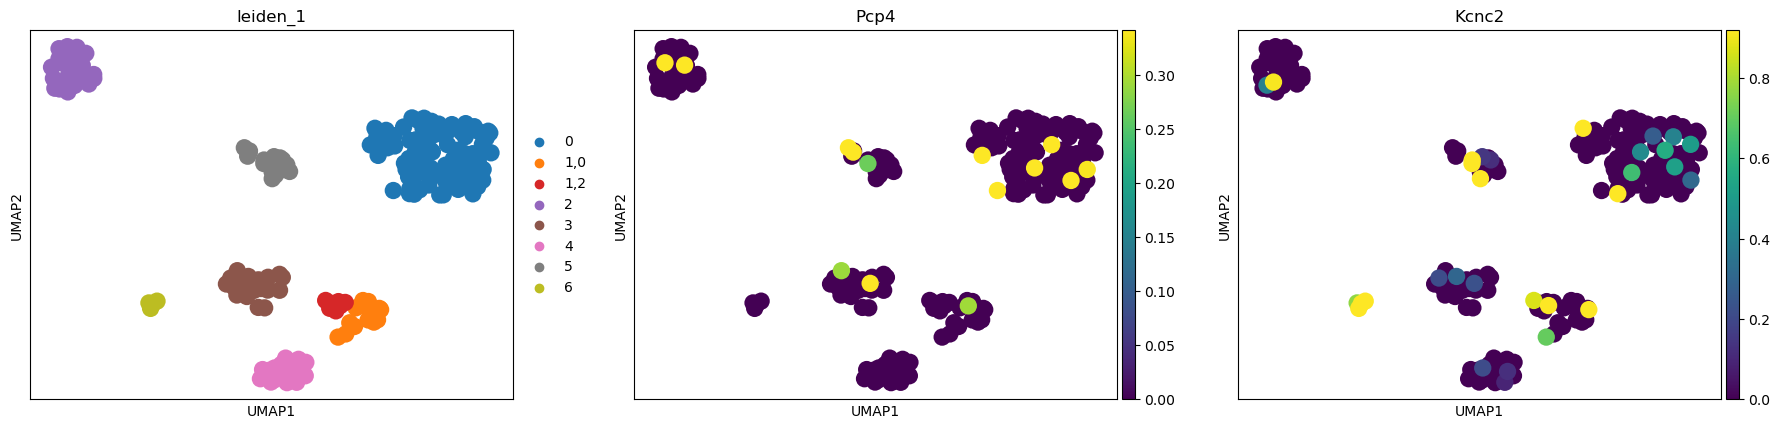

In [59]:
import scanpy as sc

# Assuming cluster3_filtered_remove is your AnnData object

# Create a boolean mask to identify cells in Leiden cluster 6 with Pcp4 > 0.6
in_leiden_cluster_6 = (cluster3_filtered_remove.obs['leiden_1'] == '6') & (pcp4_expression > 0.6)

# Create a boolean mask to identify cells in Leiden cluster 3 with Pcp4 > 0.6
in_leiden_cluster_3 = (cluster3_filtered_remove.obs['leiden_1'] == '3') & (pcp4_expression > 0.8)

# Create a combined boolean mask to identify cells to remove
cells_to_remove = in_leiden_cluster_6 | in_leiden_cluster_3

# Filter the AnnData object to keep only the cells that are not in the cells_to_remove mask
cluster3_filtered_remove = cluster3_filtered_remove[~cells_to_remove, :]

sc.pl.umap(cluster3_filtered_remove,color=['leiden_1','Pcp4','Kcnc2'],vmax='p95',layer='log1p')

[Executed on 2023-12-05 15:06:46.121011]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


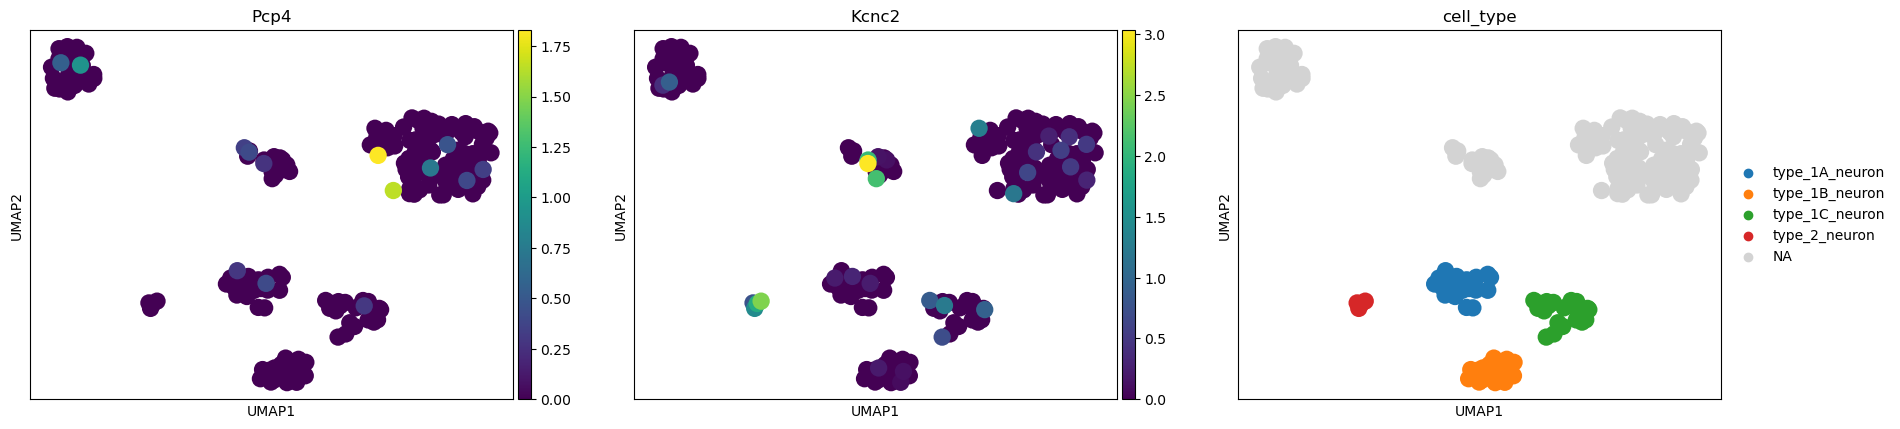

In [85]:
sc.pl.umap(cluster3_filtered_remove,color=['Pcp4','Kcnc2','cell_type'],layer='log1p')


[Executed on 2023-12-05 15:04:24.592667]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


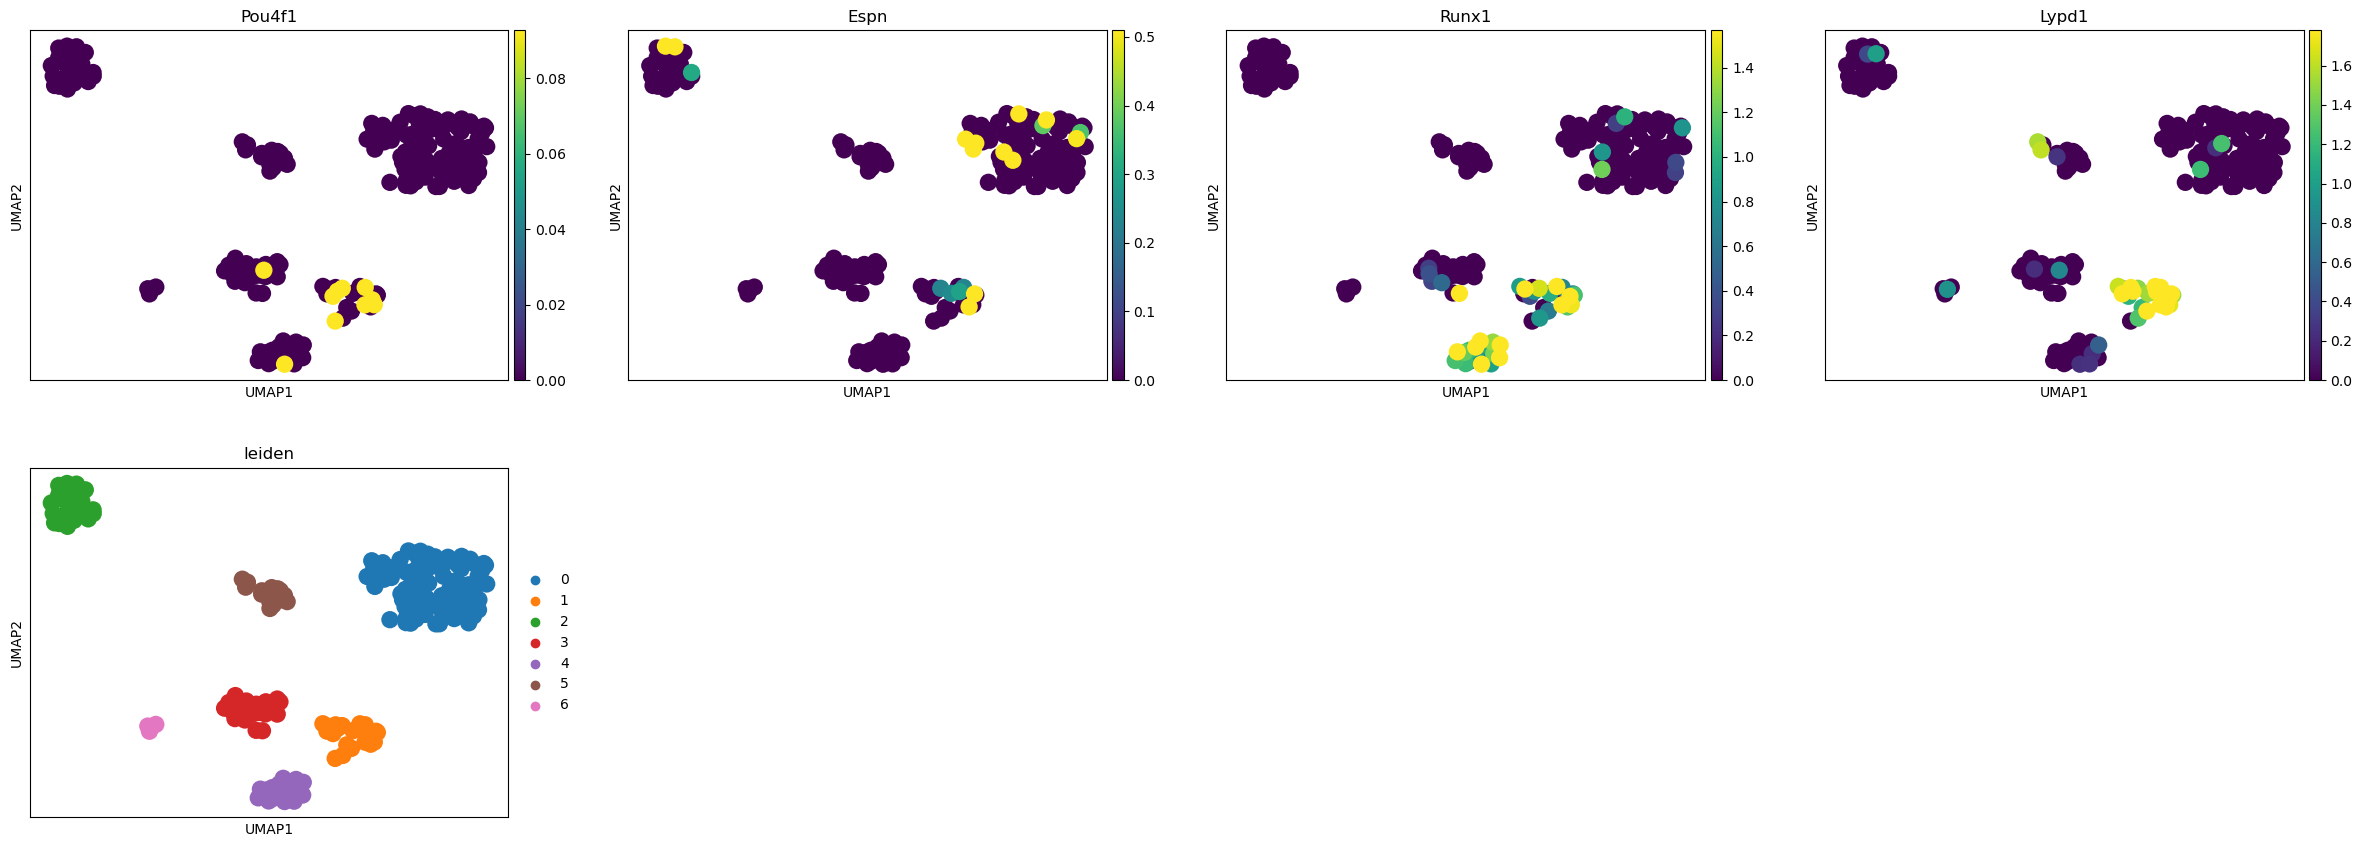

In [79]:
sc.pl.umap(cluster3_filtered_remove,color=['Pou4f1','Espn','Runx1','Lypd1','leiden'],layer='log1p',vmax='p95')


In [66]:
cluster3_filtered_remove

[Executed on 2023-12-05 14:52:47.272918]


View of AnnData object with n_obs × n_vars = 193 × 35675
    obs: 'platesID', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cell_type', 'leiden_2', 'leiden_1'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell_type_colors', 'hvg', 'leiden', 'leiden_2_colors', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap', 'leiden_1_colors'
    obsm: 'X_pca', 'X_umap', 'neuron-umap'
    varm: 'PCs'
    layers: 'Scale', 'log1p', 'reads', 'umi'
    obsp: 'connectivities', 'distances'

In [76]:
# Define a mapping of Leiden cluster to cell type
cluster_to_cell_type = {
    '1': 'type_1C_neuron',
    '6': 'type_2_neuron',
    '3': 'type_1A_neuron',
    '4': 'type_1B_neuron'
}

# Update the 'cell_type' column based on the Leiden clusters
cluster3_filtered_remove.obs['cell_type'] = cluster3_filtered_remove.obs['leiden'].map(cluster_to_cell_type)

# Print the updated cell type value counts
print(cluster3_filtered_remove.obs['cell_type'].value_counts())


[Executed on 2023-12-05 14:58:21.351538]


/scratch/43289215/ipykernel_3373/558415301.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  cluster3_filtered_remove.obs['cell_type'] = cluster3_filtered_remove.obs['leiden'].map(cluster_to_cell_type)


cell_type
type_1C_neuron    22
type_1A_neuron    22
type_1B_neuron    18
type_2_neuron      4
Name: count, dtype: int64


[Executed on 2023-12-05 14:58:49.526092]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


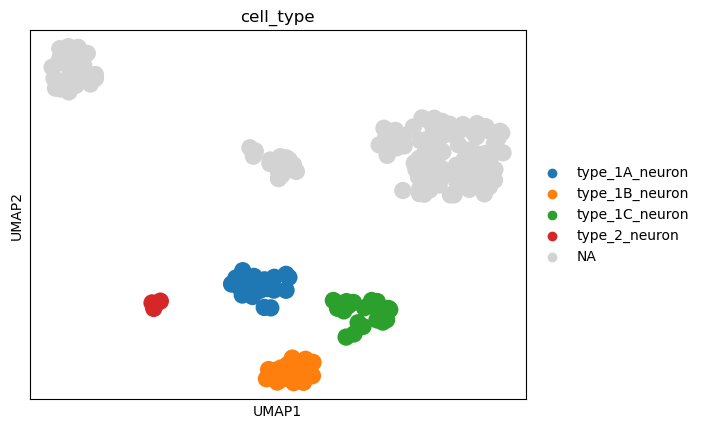

In [77]:
sc.pl.umap(cluster3_filtered_remove,color='cell_type')

[Executed on 2023-12-05 14:56:42.553642]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


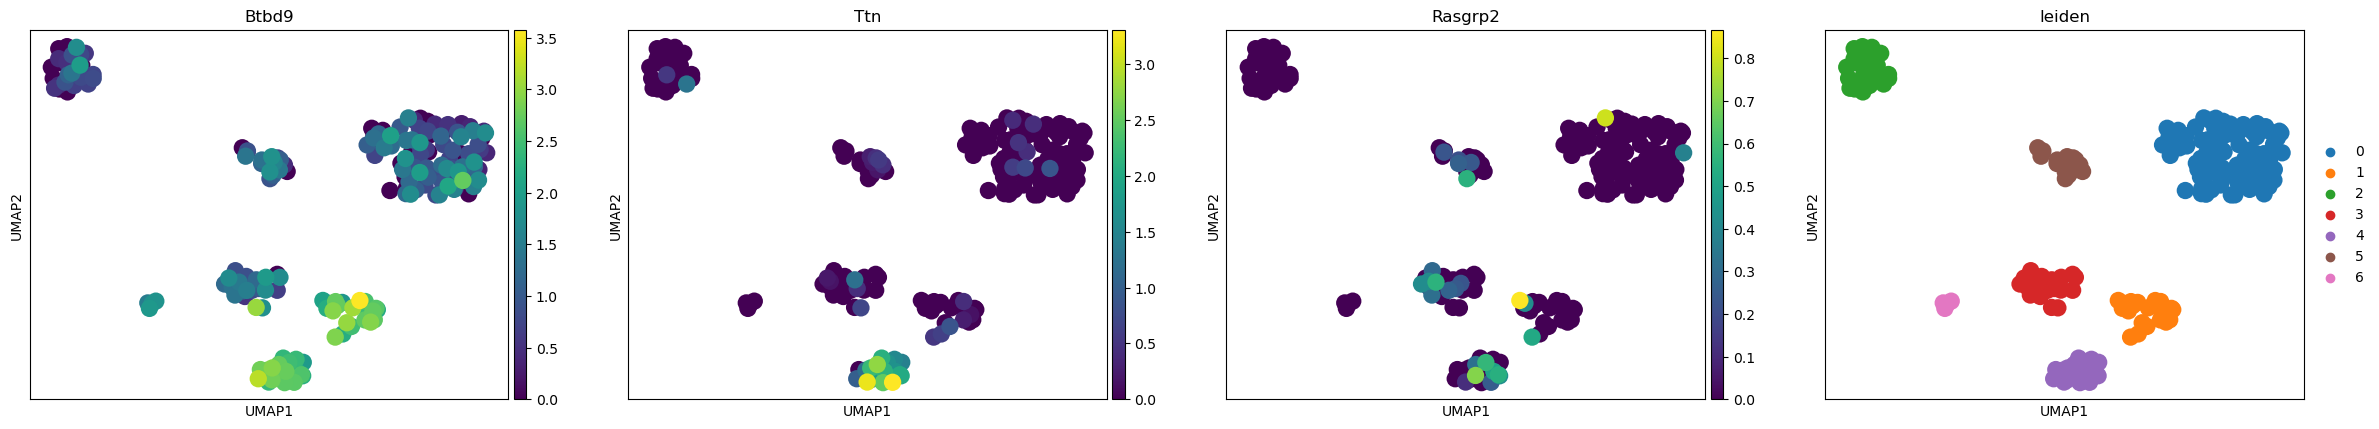

In [75]:
sc.pl.umap(cluster3_filtered_remove,color=['Btbd9','Ttn','Rasgrp2','leiden'],layer='log1p')


In [72]:
cluster3_filtered_remove.obs['leiden'].value_counts()

[Executed on 2023-12-05 14:54:36.394485]


leiden
0    85
2    26
1    22
3    22
4    18
5    16
6     4
Name: count, dtype: int64

In [71]:
cluster3_filtered_remove.obs['cell_type'].value_counts()

[Executed on 2023-12-05 14:54:17.873748]


Series([], Name: count, dtype: int64)